<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/Alien_v_s_Predators%20Image%20Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget -q https://www.dropbox.com/s/bvp753qskbaz20z/alien-vs-predator-images.zip

In [2]:
!unzip alien-vs-predator-images.zip > /dev/null; echo " done."

 done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [25]:
# create a data generator object for train and test to load data
batch_size=32

In [28]:
traindatagen = image.ImageDataGenerator(rescale=1./255.,
                                        horizontal_flip = True,
                                        rotation_range=10,
                                        zoom_range=0.25,
                                        shear_range=0.45)


train_generator = traindatagen.flow_from_directory("alien-vs-predator-images/data/train",
                                              target_size=(200,200),
                                              batch_size=batch_size,
                                              class_mode='binary')
# the class mode for two class classification should be "binary" and for multiclass classification it should be
# "categorical"

Found 694 images belonging to 2 classes.


In [29]:
testdatagen = image.ImageDataGenerator(rescale=1./255.)
test_generator = testdatagen.flow_from_directory("alien-vs-predator-images/data/validation",
                                              target_size=(200,200),
                                              batch_size=batch_size,
                                              class_mode='binary')

Found 200 images belonging to 2 classes.


In [7]:
xtrain,ytrain = train_generator.next()
print(xtrain.shape)
print(ytrain.shape)

(32, 200, 200, 3)
(32,)


In [8]:
ytrain

array([1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [9]:
train_generator.class_indices # to check which categories are represented by which binary values

{'alien': 0, 'predator': 1}

# Data Exploration

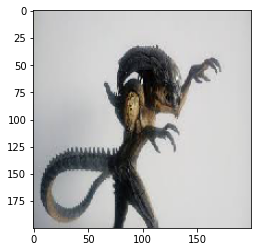

In [10]:
plt.imshow(xtrain[8])
plt.show()

# Modelling - CNN

In [23]:
from tensorflow.keras import models,layers

model = models.Sequential()
model.add(layers.Conv2D(filters=30,kernel_size=(3,3),input_shape=(200,200,3),activation='relu'))
model.add(layers.Conv2D(filters=40,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=50,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=60,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(filters=70,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=80,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

### ------------ shifting to flatten layer --------------
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(200,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))

In [30]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit_generator(train_generator,epochs=30,validation_data=test_generator)

Epoch 1/30
22/22 [==============================] - 7s 302ms/step - loss: 0.5584 - accuracy: 0.7190 - val_loss: 0.5691 - val_accuracy: 0.7400
Epoch 2/30
22/22 [==============================] - 7s 298ms/step - loss: 0.5142 - accuracy: 0.7752 - val_loss: 0.5852 - val_accuracy: 0.7550
Epoch 3/30
22/22 [==============================] - 6s 294ms/step - loss: 0.4977 - accuracy: 0.7680 - val_loss: 0.6977 - val_accuracy: 0.7400
Epoch 4/30
22/22 [==============================] - 7s 300ms/step - loss: 0.4836 - accuracy: 0.7608 - val_loss: 0.6587 - val_accuracy: 0.7300
Epoch 5/30
22/22 [==============================] - 7s 299ms/step - loss: 0.4786 - accuracy: 0.7896 - val_loss: 0.7010 - val_accuracy: 0.7150
Epoch 6/30
22/22 [==============================] - 7s 297ms/step - loss: 0.4974 - accuracy: 0.7594 - val_loss: 0.6469 - val_accuracy: 0.6450
Epoch 7/30
22/22 [==============================] - 7s 298ms/step - loss: 0.5232 - accuracy: 0.7550 - val_loss: 0.5801 - val_accuracy: 0.7500
Epoch 

In [31]:
model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
22/22 [==============================] - 7s 303ms/step - loss: 0.4050 - accuracy: 0.8170 - val_loss: 0.7913 - val_accuracy: 0.7500
Epoch 2/10
22/22 [==============================] - 7s 296ms/step - loss: 0.3622 - accuracy: 0.8444 - val_loss: 0.9849 - val_accuracy: 0.7100
Epoch 3/10
22/22 [==============================] - 7s 296ms/step - loss: 0.3947 - accuracy: 0.8285 - val_loss: 0.8581 - val_accuracy: 0.7400
Epoch 4/10
22/22 [==============================] - 7s 296ms/step - loss: 0.3603 - accuracy: 0.8429 - val_loss: 0.7270 - val_accuracy: 0.7700
Epoch 5/10
22/22 [==============================] - 6s 295ms/step - loss: 0.3506 - accuracy: 0.8401 - val_loss: 0.9402 - val_accuracy: 0.7700
Epoch 6/10
22/22 [==============================] - 7s 298ms/step - loss: 0.3359 - accuracy: 0.8487 - val_loss: 0.7487 - val_accuracy: 0.7650
Epoch 7/10
22/22 [==============================] - 6s 295ms/step - loss: 0.3508 - accuracy: 0.8429 - val_loss: 0.7750 - val_accuracy: 0.7650
Epoch 

In [32]:
model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
22/22 [==============================] - 7s 303ms/step - loss: 0.3256 - accuracy: 0.8646 - val_loss: 0.8878 - val_accuracy: 0.7450
Epoch 2/10
22/22 [==============================] - 7s 296ms/step - loss: 0.3174 - accuracy: 0.8501 - val_loss: 0.8298 - val_accuracy: 0.7650
Epoch 3/10
22/22 [==============================] - 7s 296ms/step - loss: 0.2971 - accuracy: 0.8775 - val_loss: 0.7605 - val_accuracy: 0.7500
Epoch 4/10
22/22 [==============================] - 6s 294ms/step - loss: 0.3488 - accuracy: 0.8545 - val_loss: 0.6356 - val_accuracy: 0.7600
Epoch 5/10
22/22 [==============================] - 7s 295ms/step - loss: 0.3122 - accuracy: 0.8573 - val_loss: 0.8178 - val_accuracy: 0.7600
Epoch 6/10
22/22 [==============================] - 7s 297ms/step - loss: 0.2756 - accuracy: 0.8746 - val_loss: 0.8345 - val_accuracy: 0.7500
Epoch 7/10
22/22 [==============================] - 7s 302ms/step - loss: 0.3230 - accuracy: 0.8761 - val_loss: 0.8275 - val_accuracy: 0.7700
Epoch 

In [33]:
model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
22/22 [==============================] - 7s 301ms/step - loss: 0.3055 - accuracy: 0.8660 - val_loss: 0.9034 - val_accuracy: 0.7600
Epoch 2/10
22/22 [==============================] - 6s 294ms/step - loss: 0.2578 - accuracy: 0.8876 - val_loss: 0.7766 - val_accuracy: 0.7600
Epoch 3/10
22/22 [==============================] - 6s 294ms/step - loss: 0.2743 - accuracy: 0.8847 - val_loss: 0.7823 - val_accuracy: 0.7500
Epoch 4/10
22/22 [==============================] - 7s 297ms/step - loss: 0.2732 - accuracy: 0.8876 - val_loss: 0.6970 - val_accuracy: 0.7600
Epoch 5/10
22/22 [==============================] - 6s 295ms/step - loss: 0.2688 - accuracy: 0.8862 - val_loss: 0.5437 - val_accuracy: 0.7750
Epoch 6/10
22/22 [==============================] - 7s 297ms/step - loss: 0.3227 - accuracy: 0.8501 - val_loss: 1.0224 - val_accuracy: 0.7700
Epoch 7/10
22/22 [==============================] - 7s 296ms/step - loss: 0.2707 - accuracy: 0.8890 - val_loss: 0.7093 - val_accuracy: 0.7550
Epoch 

In [34]:
model.fit_generator(train_generator,epochs=10,validation_data=test_generator)

Epoch 1/10
22/22 [==============================] - 7s 300ms/step - loss: 0.2318 - accuracy: 0.9035 - val_loss: 0.8357 - val_accuracy: 0.7800
Epoch 2/10
22/22 [==============================] - 7s 297ms/step - loss: 0.1857 - accuracy: 0.9236 - val_loss: 1.1563 - val_accuracy: 0.7850
Epoch 3/10
22/22 [==============================] - 7s 298ms/step - loss: 0.2395 - accuracy: 0.9107 - val_loss: 0.6919 - val_accuracy: 0.7250
Epoch 4/10
22/22 [==============================] - 7s 296ms/step - loss: 0.2053 - accuracy: 0.9207 - val_loss: 1.1092 - val_accuracy: 0.7850
Epoch 5/10
22/22 [==============================] - 7s 299ms/step - loss: 0.2162 - accuracy: 0.9150 - val_loss: 0.7470 - val_accuracy: 0.7600
Epoch 6/10
22/22 [==============================] - 7s 296ms/step - loss: 0.2308 - accuracy: 0.8919 - val_loss: 1.5460 - val_accuracy: 0.7450
Epoch 7/10
22/22 [==============================] - 7s 297ms/step - loss: 0.2781 - accuracy: 0.8934 - val_loss: 0.8286 - val_accuracy: 0.7700
Epoch 

In [35]:
model.save("alien_vs_preditor.h5")